In [1]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

### Question 1
> <font size="4"> H(Z) = $(1-0.9e^{j0.6\pi}z^{-1})(1-0.9e^{-j0.6\pi}z^{-1})(1-1.25e^{j0.8\pi}z^{-1})(1-1.25e^{-j0.8\pi}z^{-1})$<br><br>
> h[n] = $\delta[n]$ -$(a+a^*+b+b^*)\delta[n-1]$+$(|a|^2+|b|^2+ab+a^*b^*+ab^*+ba^*)\delta[n-2]$-$(|a|^2(b+b^*)-|b|^2(a+a^*))\delta[n-3]$+$|a|^2|b|^2 \delta[n-4]$ <br><br>
    where a = $0.9e^{j0.6\pi}$, b = $1.25e^{j0.8\pi} $<font>

In [2]:
#1
a=0.9*(np.cos(0.6*np.pi)+(np.sin(0.6*np.pi)*1j))
b=1.25*(np.cos(0.8*np.pi)+(np.sin(0.8*np.pi)*1j))
a1=-(a+np.conj(a)+b+np.conj(b))
a2=(abs(a)**2 + (abs(b)**2)+(a*b)+(a*np.conj(b))+(b*np.conj(a))+(np.conj(b)*np.conj(a)))
a3=-((abs(a)**2)*(b+np.conj(b)) + ((abs(b)**2)*(a+np.conj(a))))
a4=((abs(a*b))**2)
h=np.array([1,a1,a2,a3,a4])
h=h.real
print('h[n] is ',h)
def conv(x, h, n):
    x = np.hstack((np.zeros(np.sum(n < 0)), np.array(x)))          #adding zeros at beginning 
    h = np.flip(h)

    n  =  x.shape[0]
    m = h.shape[0]
    pads = np.zeros(m-1)
    x =  np.hstack((pads, x, pads))
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])    #summing all possible indexes
    return y
def Audio_conv(sound_file,sound_conv,h,n):
    sound = wave.open(sound_file,'r') # reading the sound file
    # Extract Raw Audio from Wav File
    signal = sound.readframes(-1)  #Reading the all the frames of audio signal into bytes
    s = np.frombuffer(signal,dtype=np.uint8) # converting bytes to nparray
    f_rate = sound.getframerate() # finding the framerate of the audio signal
    g = sound.getsampwidth()
    
    sound.close()
    soundnew = wave.open(sound_conv,'wb')      # opening new wave file                                # using the same file if duration of audio is less than 1 second
    Audio_conv = conv(s,h,n)
    data = Audio_conv.astype(np.uint8)         # converting array to int8 
    soundnew.setnchannels(1)                   # setting channels
    soundnew.setsampwidth(1)                   # setting sample width
    soundnew.setframerate(f_rate)              # setting frame rate
    soundnew.writeframesraw(data)              # writing data to frames
    soundnew.close()
    
    return (Audio_conv,s)
def DTFT(dat,w):
    # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N=len(w)
    DTFT = np.zeros(N)+np.ones(N)*1j #Initializing DTFT
    for i in range(N):               #computing DTFT
        dtft = 0
        for k in range(len(dat)):
            dtft += dat[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = []                          #Magnitude Array
    dtft_phi = []                          #Phase Array
    for i in range(N):                     #Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]           #Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    #Magnitude Plot
    f2=plt.figure(2,figsize=(15, 10))
    plt.plot(w,dtft_mag)
    plt.xlabel('w')
    plt.ylabel('|X(e^jw)|')
    plt.title('Magnitude Spectrum')
    #Phase Plot
    f3=plt.figure(3,figsize=(15, 10))
    plt.plot(w,dtft_phi)
    plt.xlabel('w')
    plt.ylabel('Phase(X(e^jw))')
    plt.title('Phase Spectrum')
    plt.show()
    return(DTFT)


M = Audio_conv('alarm.wav','alarmfir.wav',h,np.linspace(0,len(h)-1,num=len(h)))


h[n] is  [1.         2.57877308 3.4975     2.50736971 1.265625  ]


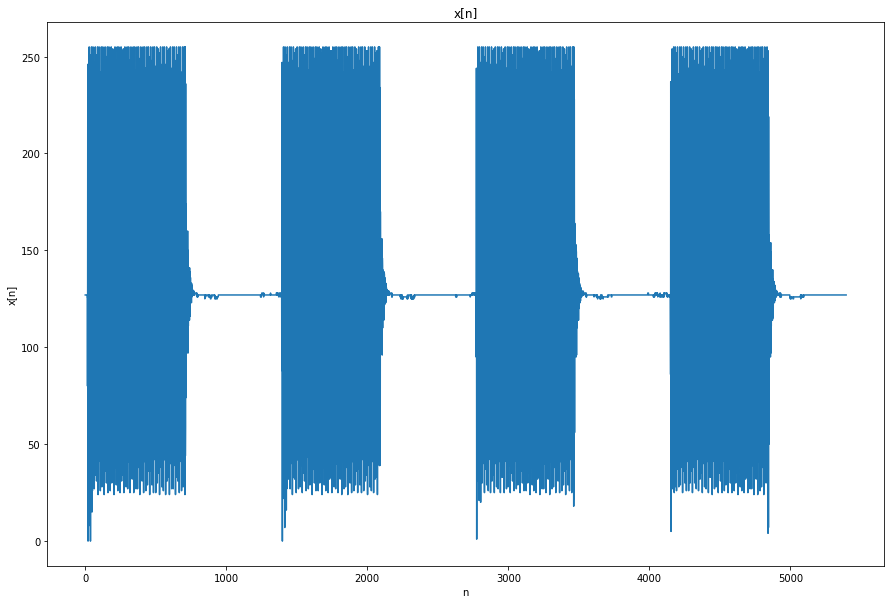

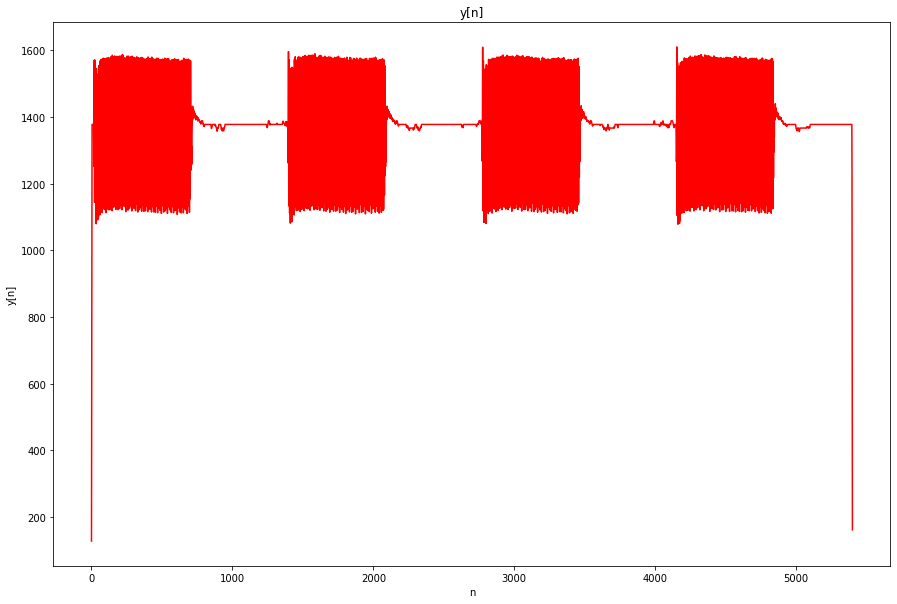

In [3]:
f1=plt.figure(1,figsize=(15, 10))
plt.plot(M[1])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
f2=plt.figure(2,figsize=(15, 10))
plt.plot(M[0],'r')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n]')
playsound('alarmfir.wav')

> Plot of x[n]and y[n]

### Question 2
><font size="5">$G(z)$=$\frac{1}{|b|^2(1-\frac{z^{-1}}{b})(1-\frac{z^{-1}}{b^*})(1-az^{-1})(1-a^*z^{-1})}$<font>

In [11]:
x=b
A = 1/((abs(b)**2)*(1-(x/np.conj(b)))*(1-a*x)*(1-np.conj(a)*x)) 
x=np.conj(b)
B = 1/((abs(b)**2)*(1-(x/(b)))*(1-a*x)*(1-np.conj(a)*x))
x=1/a
C = 1/((abs(b)**2)*(1-(x*np.conj(a)))*(1-(1/b)*x)*(1-(1/np.conj(b))*x))
x=1/np.conj(a)
D = 1/((abs(b)**2)*(1-(x*(a)))*(1-(1/b)*x)*(1-(1/np.conj(b))*x))
print(A,B,C,D)
def G(n):
    G=np.zeros(len(n))+np.zeros(len(n))*1j
    for i in range(len(n)):
        G[i]=np.real((A*((1/b)**n[i]))+(B*((1/np.conj(b))**n[i]))+(C*((a)**n[i]))+(D*((np.conj(a))**n[i]))) 
    return(G)
n=np.linspace(0,100,101)
xcap=conv(M[0],G(n), np.linspace(0,len(h)-1,num=len(h)))
w=np.linspace(-np.pi,np.pi,num=101)

(0.46663288710561474-0.08383871435856184j) (0.4666328871056146+0.08383871435856181j) (-0.14663288710561473+0.3406233628839109j) (-0.1466328871056147-0.34062336288391093j)


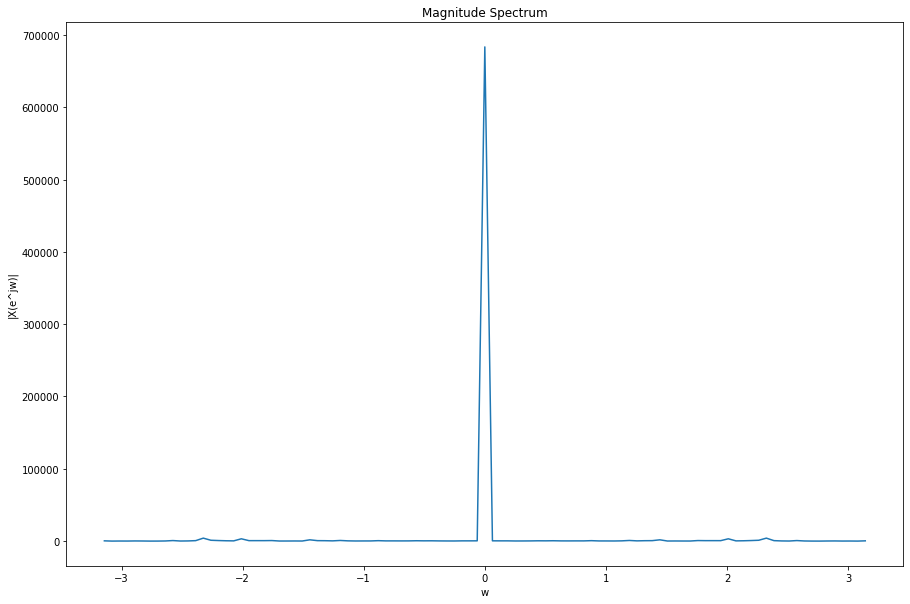

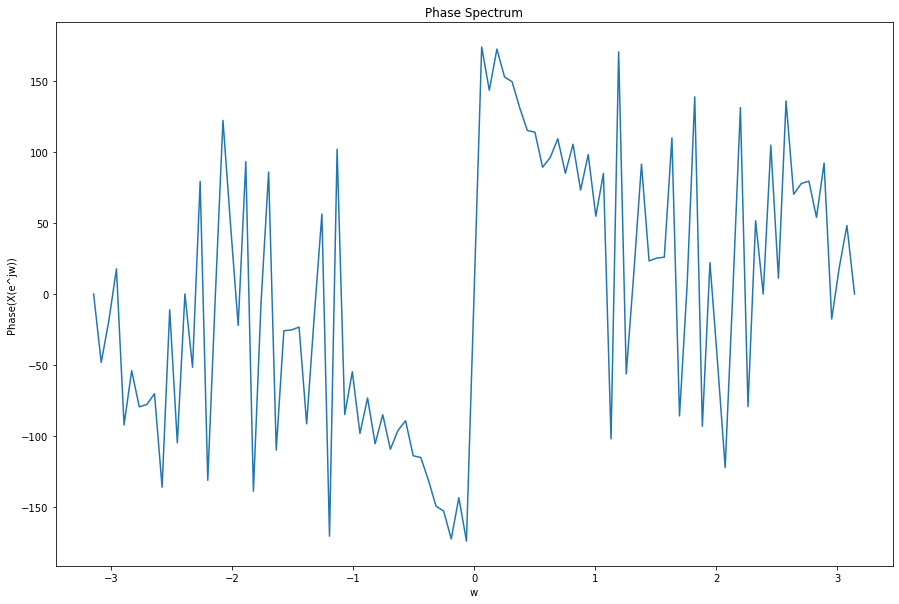

In [12]:
k=DTFT(M[1],w)

> Above is plot for magnitude and phase spectra of X($e^{jw}$)

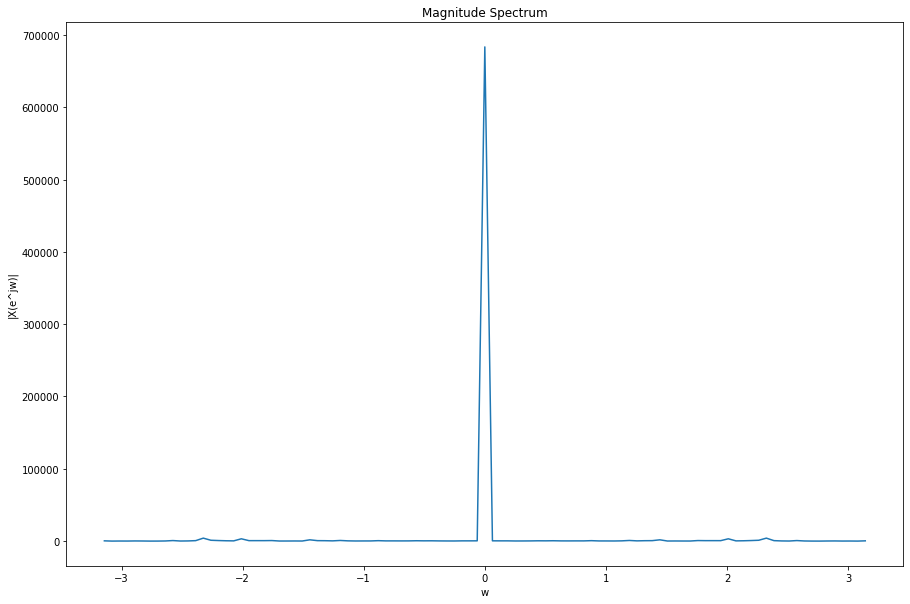

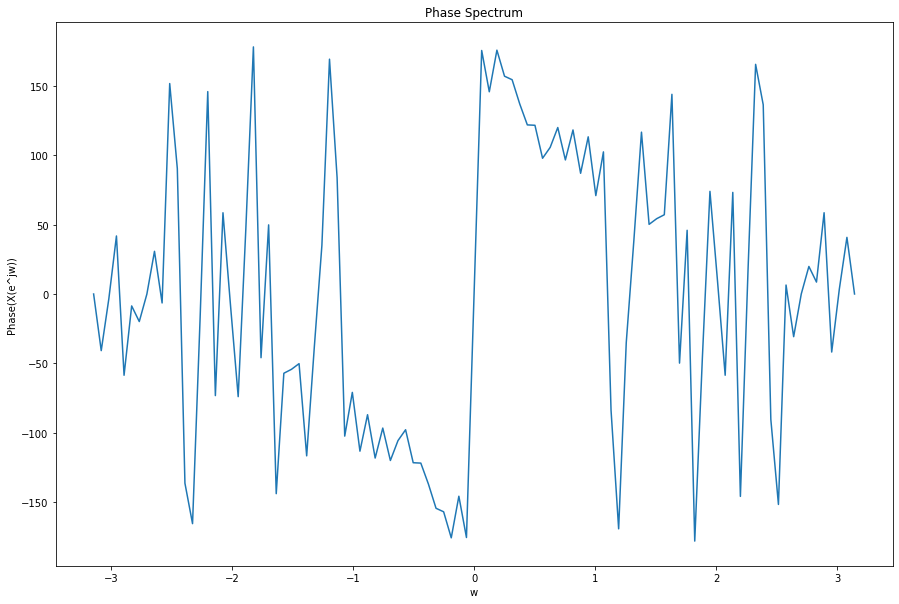

In [13]:
m=DTFT(xcap,w)

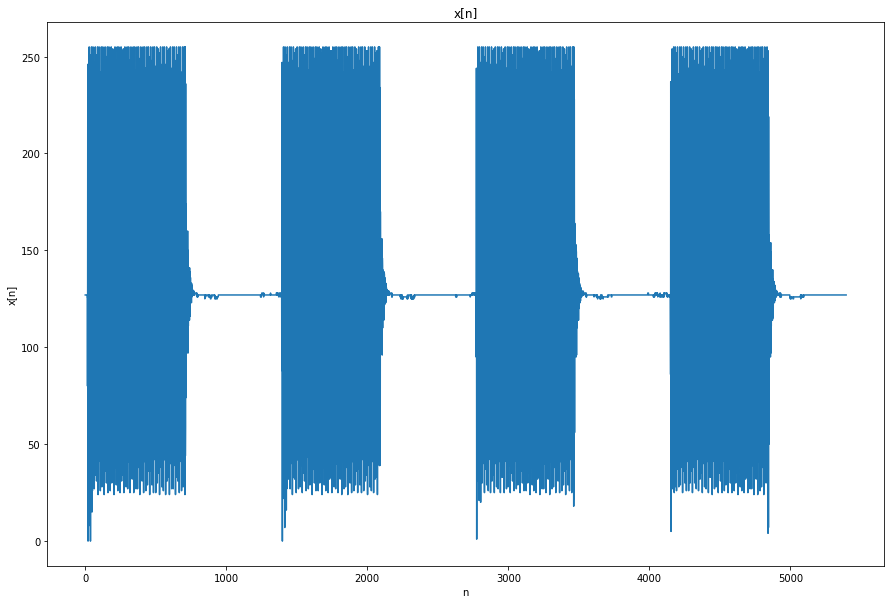

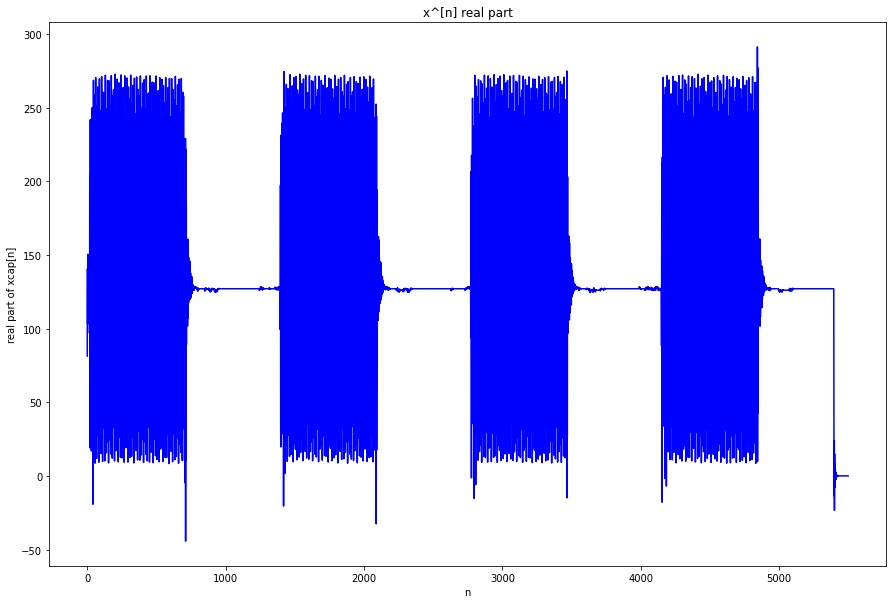

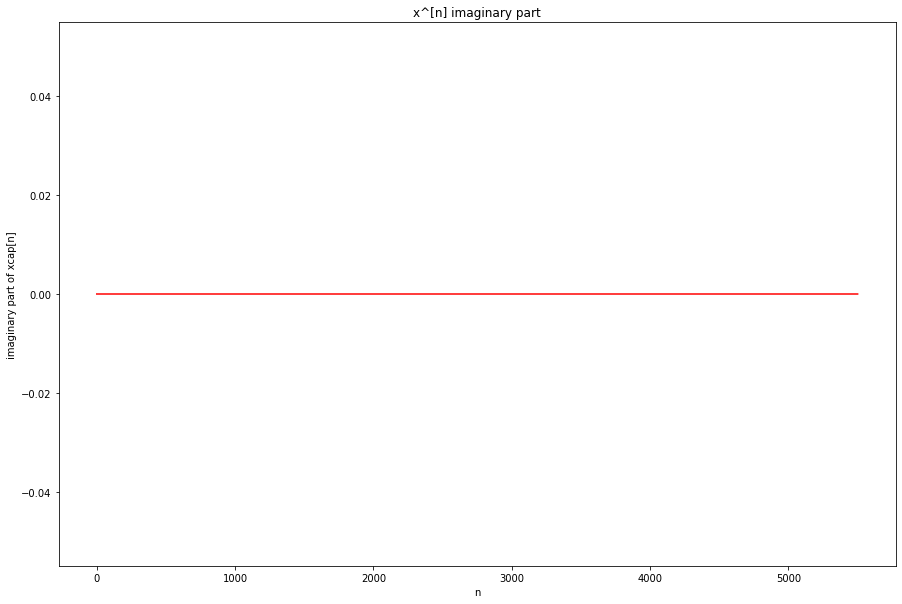

In [14]:
f5=plt.figure(5,figsize=(15, 10))
plt.plot(M[1])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
f6=plt.figure(6,figsize=(15, 10))
plt.plot(xcap.real,'b')
plt.xlabel('n')
plt.ylabel('real part of xcap[n]')
plt.title('x^[n] real part')
f7=plt.figure(7,figsize=(15, 10))
plt.plot(xcap.imag,'r')
plt.xlabel('n')
plt.ylabel('imaginary part of xcap[n]')
plt.title('x^[n] imaginary part')
sound = wave.open('alarm.wav','r')
f_rate = sound.getframerate()
sound.close()
soundnew = wave.open('alarmfirr.wav','wb')      # opening new wave file                                # using the same file if duration of audio is less than 1 second
data = xcap.real.astype(np.uint8)         # converting array to int8 
soundnew.setnchannels(1)                   # setting channels
soundnew.setsampwidth(1)                   # setting sample width
soundnew.setframerate(f_rate)              # setting frame rate
soundnew.writeframesraw(data)              # writing data to frames
soundnew.close()
playsound('alarmfirr.wav')

> Above is plot for magnitude and phase spectra of $\hat{X}$($e^{jw}$)

### Observation
> The magnitude plots are but a little scales at w=0 which may be due to any computational errors or if all pass system has some magnitude other than 1.<br>
> But the phase is completely different between them.<br>
> The undoing the effect of the distorting system is still a little distorted but it's almost clear audio.Although it doesn't work in every case because phase effects the $\hat{x}[n]$ too.

In [7]:
#3
def DTFTnew(dat,w):
    # data is the numpy array of signal, w is frequency,n is the sequence scale.
    N=len(w)
    DTFT = np.zeros(N)+np.ones(N)*1j #Initializing DTFT
    for i in range(N):               #computing DTFT
        dtft = 0
        for k in range(len(dat)):
            dtft += dat[k]*(np.cos(w[i]*k)+(np.sin(w[i]*k)*1j)) 
        DTFT[i]=dtft
    #MagnitudeSpectrum and Phase spectrum
    dtft_mag = []                          #Magnitude Array
    dtft_phi = []  #Phase Array
    dtft_G = np.zeros(N)   
    for i in range(N):                     #Calculating phase and magnitude
        dtft_mag+=[abs(DTFT[i])]           #Magnitude = root(real^2 + img^2)
        dtft_phi+=[np.angle(DTFT[i],deg=True)]#Phase=arctan(img/real)
    for i in range(N): 
        if i > 1:
            dtft_G[i]=-(dtft_phi[i]-dtft_phi[i-1])/(w[i]-w[i-1])*(np.pi/180)
        elif i==1:
            dtft_G[i]=-(dtft_phi[i]-dtft_phi[i-1])/(w[i]-w[i-1])*(np.pi/180)
            dtft_G[i-1]=dtft_G[i]

    #Magnitude Plot
    f2=plt.figure(2,figsize=(15, 10))
    plt.plot(w,dtft_mag)
    plt.xlabel('w')
    plt.ylabel('|X(e^jw)|')
    plt.title('Magnitude Spectrum')
    #Phase Plot
    f3=plt.figure(3,figsize=(15, 10))
    plt.plot(w,dtft_phi)
    plt.xlabel('w')
    plt.ylabel('Phase(X(e^jw))')
    plt.title('Phase Spectrum')
    f4=plt.figure(4,figsize=(15, 10))
    plt.plot(w,dtft_G)
    plt.xlabel('w')
    plt.ylabel('grp[H(e^jw)]')
    plt.title('groupdelay')
    plt.show()
    return(DTFT)
w_0=np.linspace(0,2*np.pi,num=1001)

### 3-a
> h[n] = u[n] - u[n-5] = $ \delta[n] + \delta[n-1]+ \delta[n-2] + \delta[n-3] + \delta[n-4]$

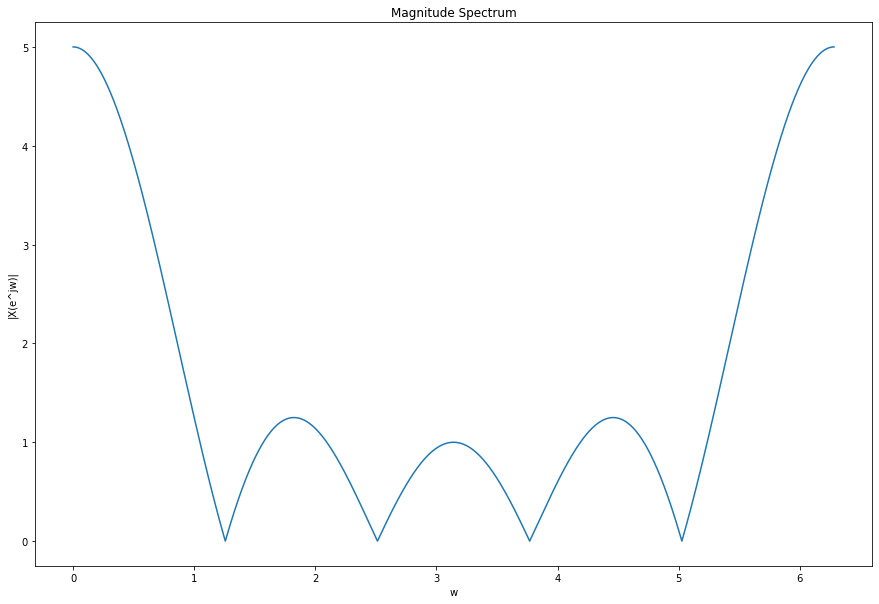

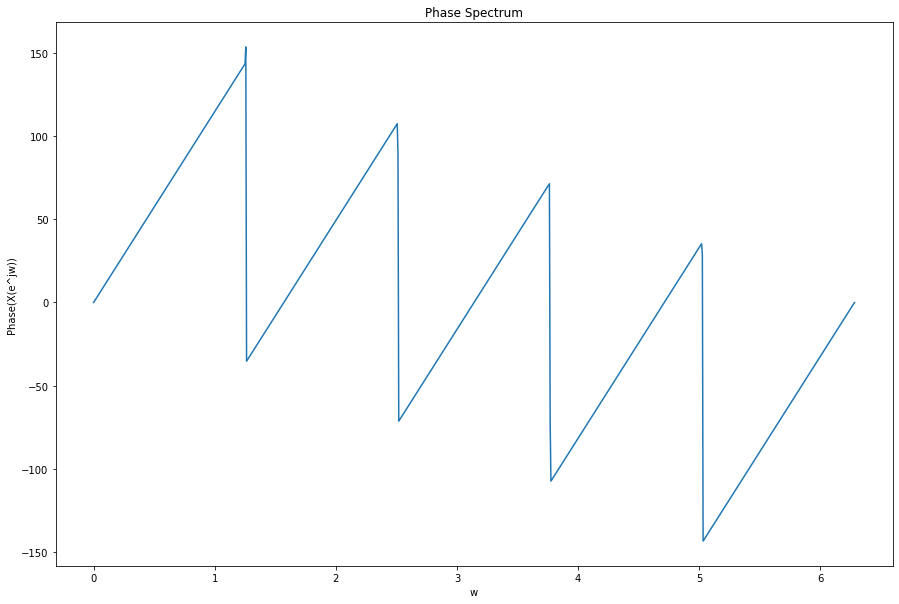

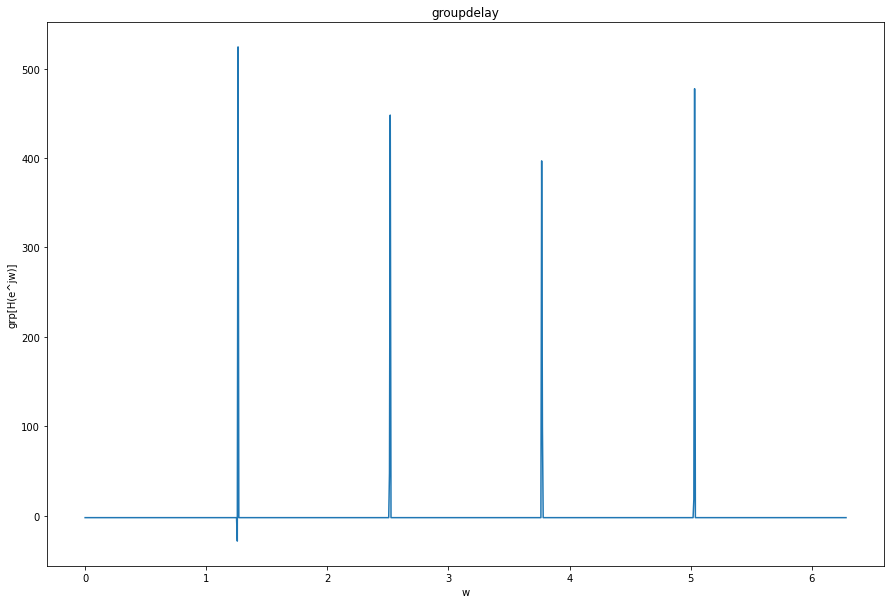

In [8]:
#3-a
h1=[1,1,1,1,1,0]
H1=DTFTnew(h1,w_0)

### 3-b
> h[n] = u[n] - u[n-6] = $ \delta[n] + \delta[n-1]+ \delta[n-2] + \delta[n-3] + \delta[n-4] + \delta[n-5]$

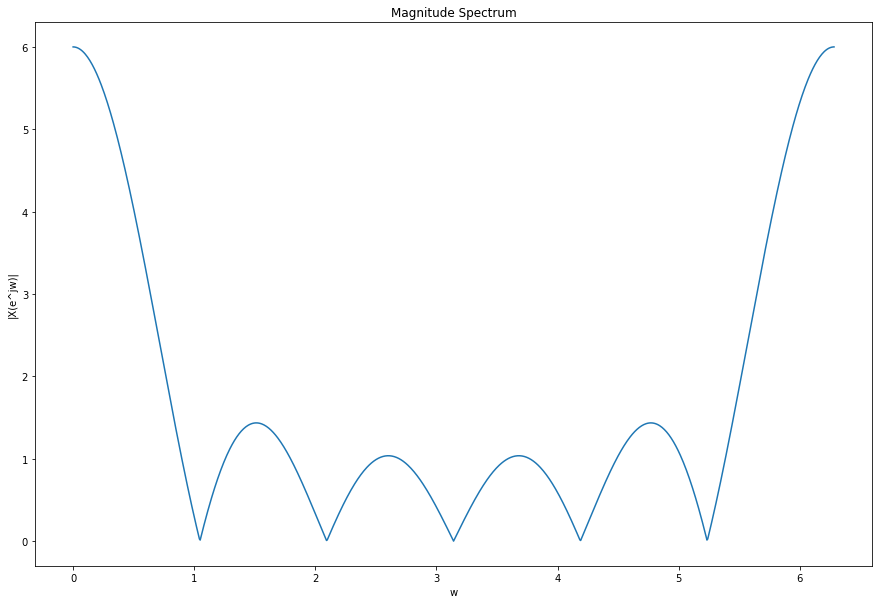

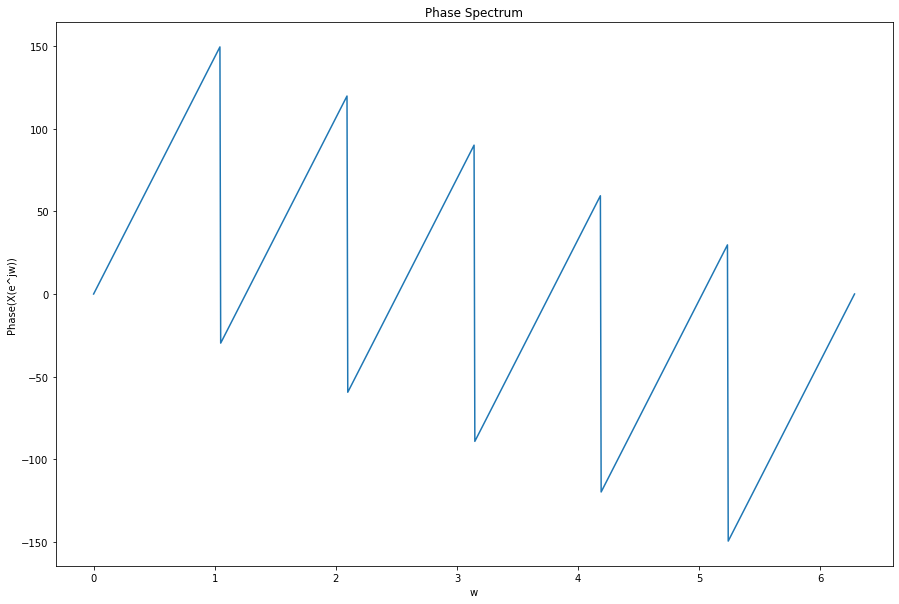

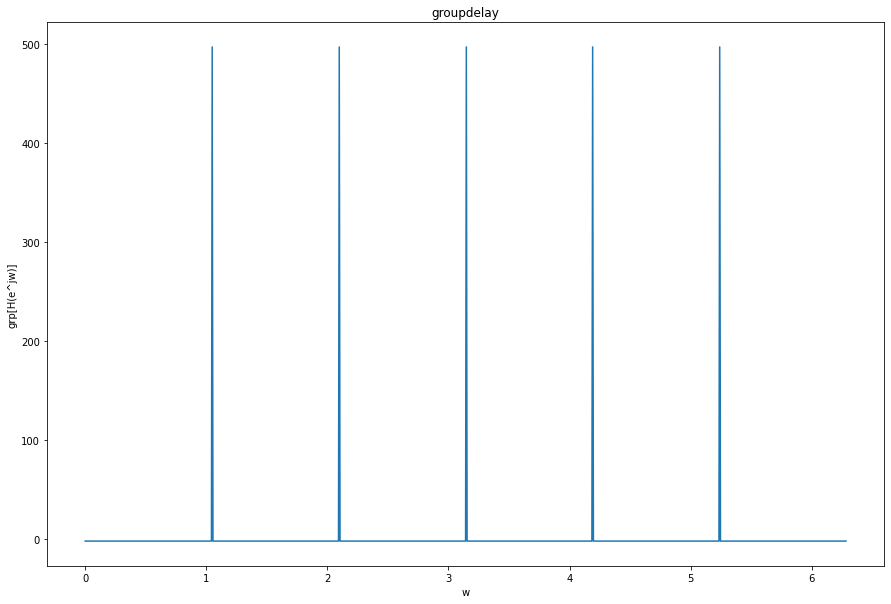

In [9]:
#3-b
h2=[1,1,1,1,1,1]
H2=DTFTnew(h2,w_0)

### 3-c
> h[n] = $\delta[n] - \delta[n-2]$

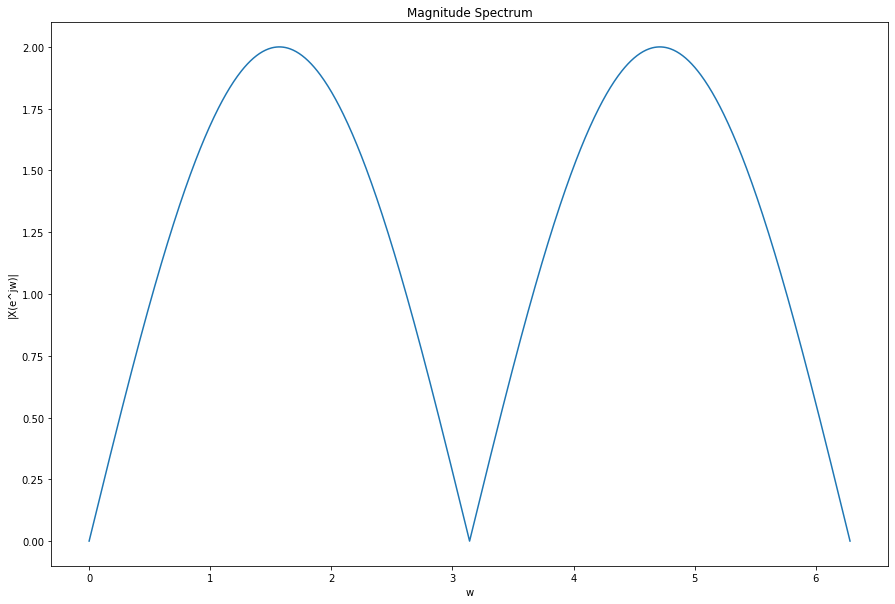

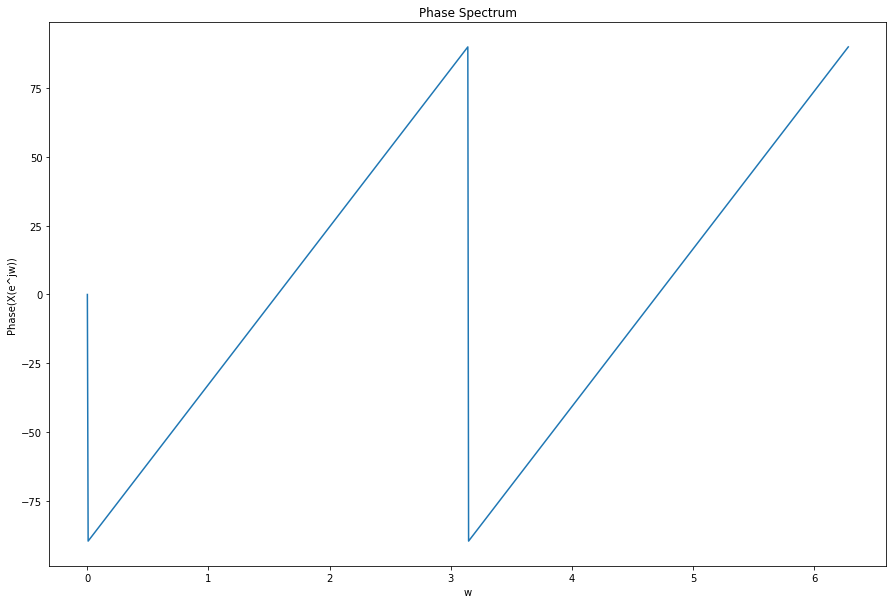

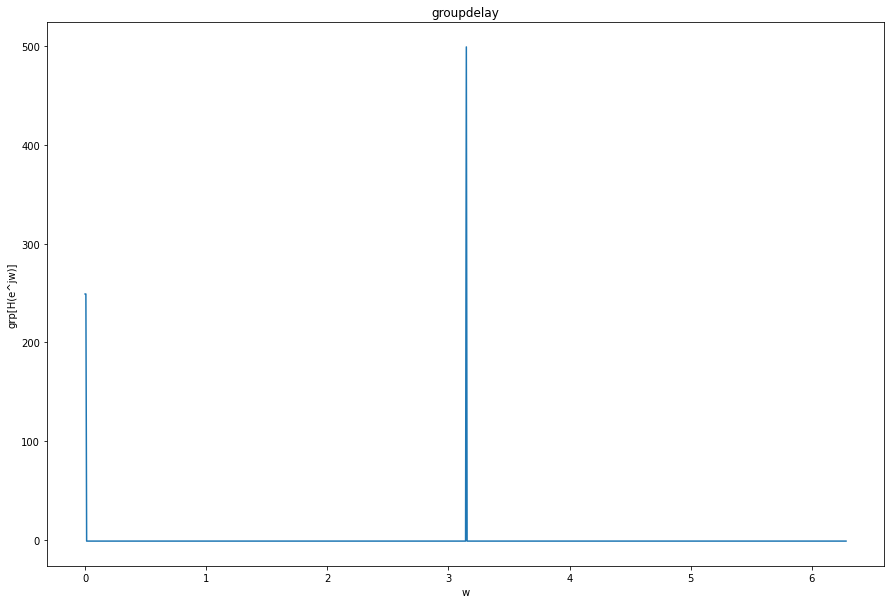

In [10]:
#3-c
h3=[1,0,-1]
H3=DTFTnew(h3,w_0)

### 3-d
> h[n] = $\delta[n] - \delta[n-1]$

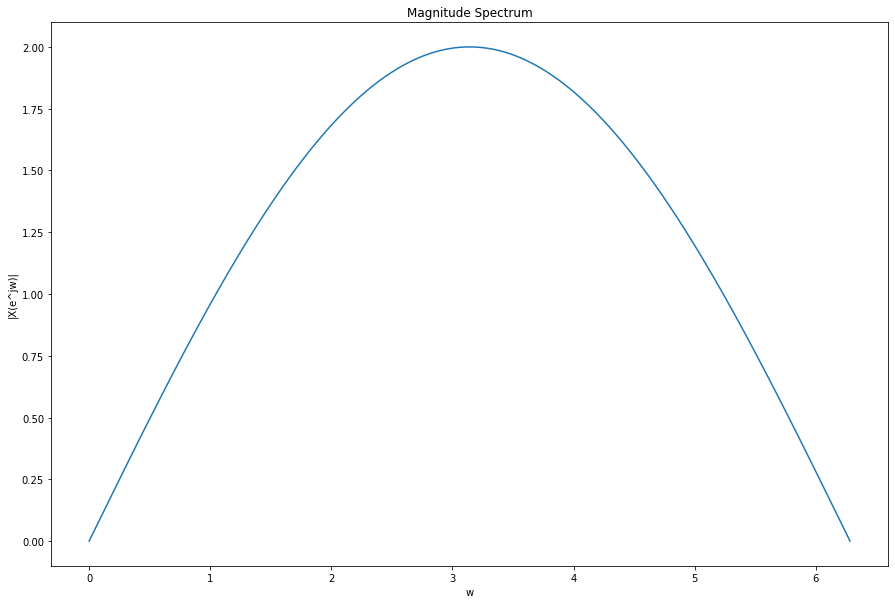

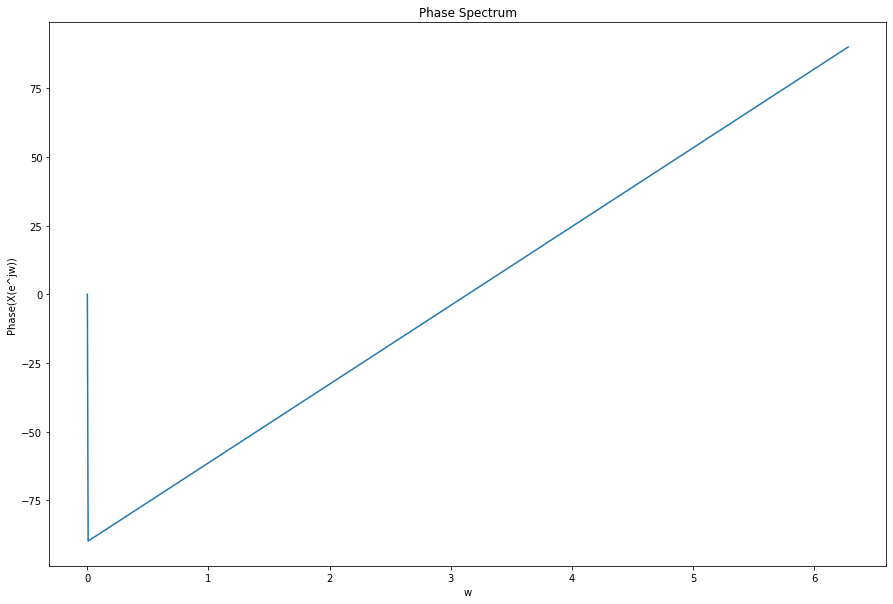

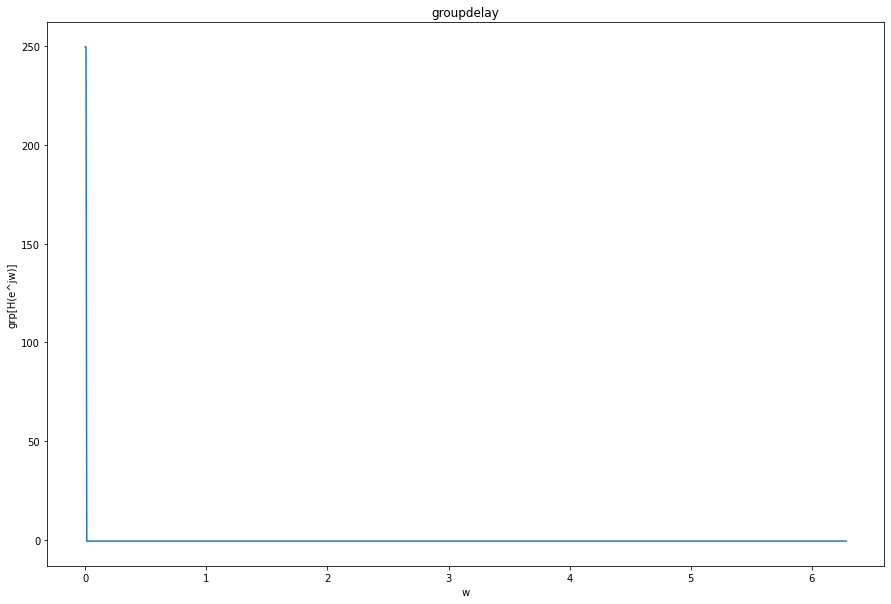

In [11]:
#3-d
h4=[1,-1]
H4=DTFTnew(h4,w_0)